In [48]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [49]:
file = open("data1.txt", "r", encoding = "utf8")
lines = []

for i in file:
    lines.append(i)
    
print("The First Line: ", lines[0])
print("The Last Line: ", lines[-1])

The First Line:  Love encompasses a range of strong and positive emotional and mental states, from the most sublime virtue or good habit, 

The Last Line:  the feelings involved makes love unusually difficult to consistently define, compared to other emotional states.


# Data Cleaning

In [50]:
data = ""

for i in lines:
    data = ' '. join(lines)
    
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')
data[:400]

'Love encompasses a range of strong and positive emotional and mental states, from the most sublime virtue or good habit,  the deepest interpersonal affection, to the simplest pleasure. An example of this range of meanings is that the  love of a mother differs from the love of a spouse, which differs from the love for food. Most commonly,  love refers to a feeling of a strong attraction and emotion'

In [51]:
import string

translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
new_data = data.translate(translator)

new_data[:500]

'Love encompasses a range of strong and positive emotional and mental states  from the most sublime virtue or good habit   the deepest interpersonal affection  to the simplest pleasure  An example of this range of meanings is that the  love of a mother differs from the love of a spouse  which differs from the love for food  Most commonly   love refers to a feeling of a strong attraction and emotional attachment   Love is considered to be both positive and negative  with its virtue representing hu'

In [52]:
q = []

for i in data.split():
    if i not in q:
        q.append(i)
        
data = ' '.join(q)
data[:500]

'Love encompasses a range of strong and positive emotional mental states, from the most sublime virtue or good habit, deepest interpersonal affection, to simplest pleasure. An example this meanings is that love mother differs spouse, which for food. Most commonly, refers feeling attraction attachment. considered be both negative, with its representing human kindness, compassion, as "the unselfish loyal benevolent concern another" vice moral flaw, akin vanity, selfishness, amour-propre, egotism, p'

# Tockenisation

In [53]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[1, 12, 13, 14, 15, 16, 2, 17, 18, 19, 3, 20, 4, 7, 21]

In [54]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

224


In [55]:
sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:5]

The Length of sequences are:  243


array([[ 1, 12],
       [12, 13],
       [13, 14],
       [14, 15],
       [15, 16]])

In [56]:
X = []
y = []

for i in sequences:
    X.append(i[0])
    y.append(i[1])
    
X = np.array(X)
y = np.array(y)

In [57]:
print("The Data is: ", X[:5])
print("The responses are: ", y[:5])

The Data is:  [ 1 12 13 14 15]
The responses are:  [12 13 14 15 16]


In [58]:
max_sequence_len = max([len(X) for x in sequences])
input_sequences = np.array(pad_sequences(sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences[1]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [59]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [60]:
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=1))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 100)            22400     
                                                                 
 lstm (LSTM)                 (None, 1, 100)            80400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 224)               22624     
                                                                 
Total params: 215,924
Trainable params: 215,924
Non-trainable params: 0
_________________________________________________________________


In [62]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# Callbacks

In [63]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')

reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

logdir='logsnextword1'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

# Compile The Model

In [64]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=['accuracy'])

C:\Users\Kasirai\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# Fitting The Model

In [65]:
history=model.fit(X, y, epochs=200, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])

Epoch 1/200
2/4 [==============>...............] - ETA: 0s - loss: 5.4119 - accuracy: 0.0078     
Epoch 1: loss improved from inf to 5.41255, saving model to nextword1.h5
4/4 [==============================] - 10s 363ms/step - loss: 5.4125 - accuracy: 0.0082 - lr: 0.0010
Epoch 2/200
1/4 [======>.......................] - ETA: 0s - loss: 5.4109 - accuracy: 0.0312
Epoch 2: loss improved from 5.41255 to 5.41122, saving model to nextword1.h5
4/4 [==============================] - 1s 177ms/step - loss: 5.4112 - accuracy: 0.0247 - lr: 0.0010
Epoch 3/200
1/4 [======>.......................] - ETA: 0s - loss: 5.4108 - accuracy: 0.0156
Epoch 3: loss improved from 5.41122 to 5.41048, saving model to nextword1.h5
4/4 [==============================] - 0s 125ms/step - loss: 5.4105 - accuracy: 0.0247 - lr: 0.0010
Epoch 4/200
1/4 [======>.......................] - ETA: 0s - loss: 5.4098 - accuracy: 0.0312
Epoch 4: loss improved from 5.41048 to 5.40961, saving model to nextword1.h5
4/4 [=============

In [66]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

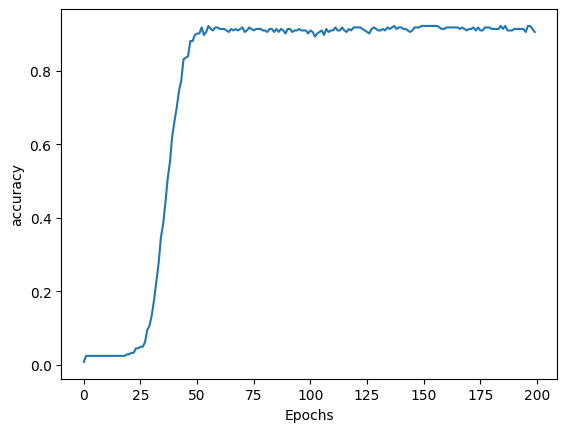

In [67]:
plot_graphs(history, 'accuracy')

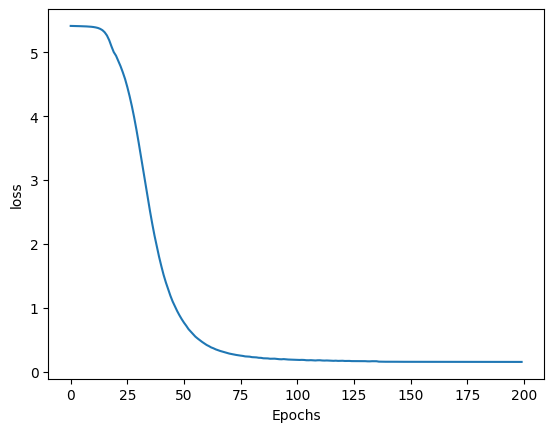

In [68]:
plot_graphs(history, 'loss')

# Making Predictions

In [69]:
max_sequence_len = max([len(X) for x in sequences])
input_sequences = np.array(pad_sequences(sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences[1]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [70]:
# Importing the Libraries

from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer

model = load_model('nextword1.h5')
tokenizer = pickle.load(open('tokenizer1.pkl', 'rb'))


In [71]:

while(True):
    seed_text = input("Enter your line: ")
  
    if seed_text == "0":
        print("Execution completed.....")
        break

    else:
        try:
            next_words = 2
            suggested_word = []
            #temp = seed_text
            for _ in range(next_words):
                
                token_list = tokenizer.texts_to_sequences([seed_text])[0]
                #print(token_list)
                token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
                predicted = np.argmax(model.predict(token_list), axis=-1)
                output_word = ""
                
                for word, index in tokenizer.word_index.items():
                    if index == predicted:
                        output_word = word
                        suggested_word.append(output_word)
                        break
                
                seed_text += " " + output_word
            print("Suggested next two word are : ",suggested_word)
            #n = int(input())
            
            print(seed_text)
        except Exception as e:
            print("Error occurred: ",e)
        continue

1/1 [==============================] - 0s 56ms/step
Suggested next two word are :  ['may', 'cafuné']
hello how may I help may cafuné
1/1 [==============================] - 0s 48ms/step
Suggested next two word are :  ['postulated', 'involved']
tell them he is busy  postulated involved
1/1 [==============================] - 0s 56ms/step
Suggested next two word are :  ['primary', 'primary']
he fell in love with primary primary
1/1 [==============================] - 0s 56ms/step
Suggested next two word are :  ['primary', 'primary']
he fell in love with primary primary
1/1 [==============================] - 0s 56ms/step
Suggested next two word are :  ['flaw', 'flaw']
she looks old but not flaw flaw
1/1 [==============================] - 0s 56ms/step
